0 __header__
1 __version__
2 __globals__
3 sv
0 __header__
1 __version__
2 __globals__
3 sv
Start PCA process...
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.09680629 seconds ---
The test time is --- 0.00099921 seconds ---
========= Confusion matrix for LDA with PCA,Reduced score shape is (72000, 4) ========== 


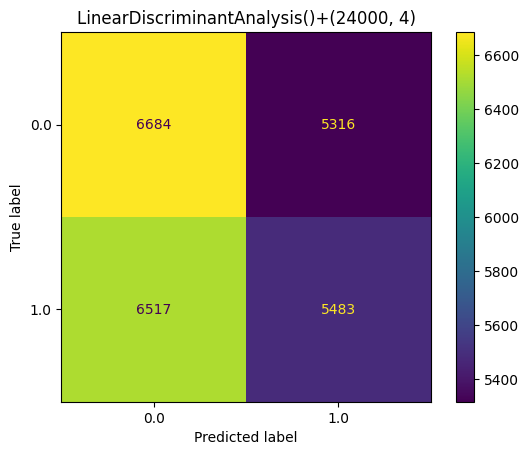

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.08276749 seconds ---
The test time is --- 0.00167632 seconds ---
========= Confusion matrix for LDA with PCA,Reduced score shape is (72000, 5) ========== 


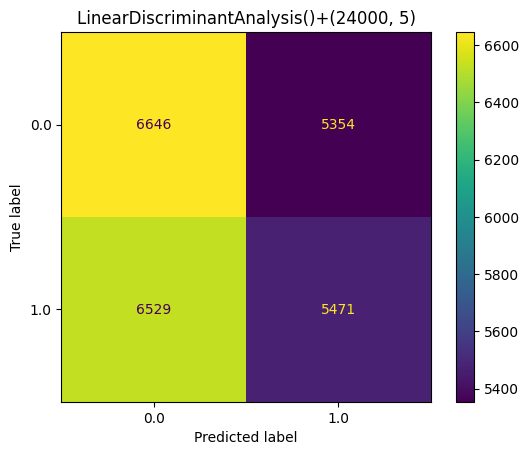

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.14411640 seconds ---
The test time is --- 0.00182271 seconds ---
========= Confusion matrix for LDA with PCA,Reduced score shape is (72000, 6) ========== 


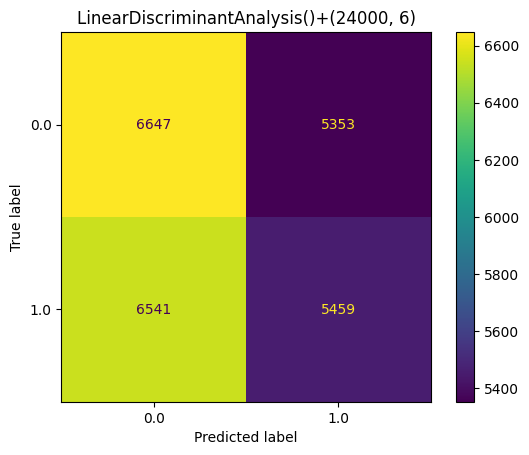

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 7) 

The train time is --- 0.14103127 seconds ---
The test time is --- 0.00404930 seconds ---
========= Confusion matrix for LDA with PCA,Reduced score shape is (72000, 7) ========== 


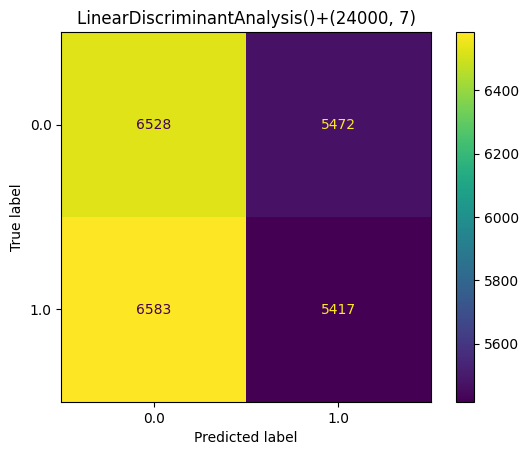

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 8) 

The train time is --- 0.09673929 seconds ---
The test time is --- 0.00201631 seconds ---
========= Confusion matrix for LDA with PCA,Reduced score shape is (72000, 8) ========== 


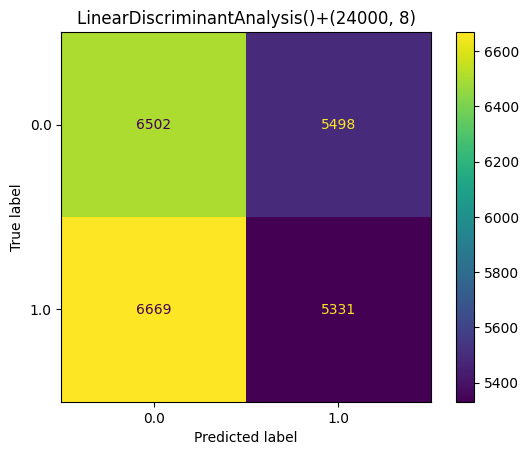

The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 285.25801992 seconds ---
The test time is --- 76.75931621 seconds ---
========= Confusion matrix for SVM with PCA, Reduced score shape is (72000, 4) ========== 


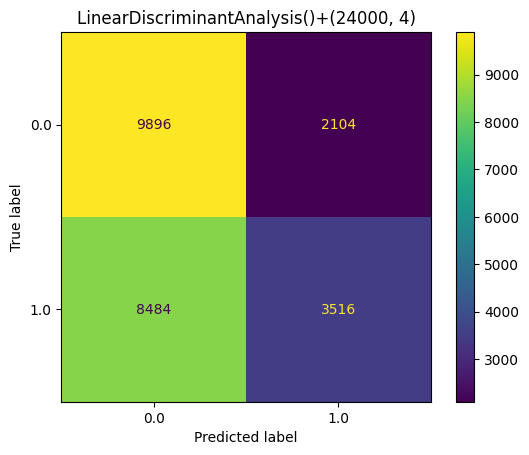

The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 315.10516834 seconds ---
The test time is --- 43.64091659 seconds ---
========= Confusion matrix for SVM with PCA, Reduced score shape is (72000, 5) ========== 


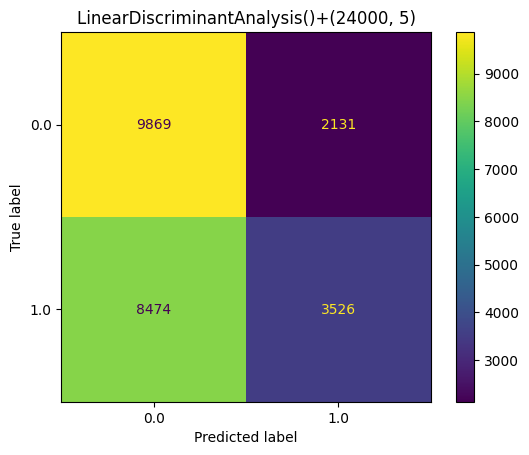

The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 



In [1]:
import scipy.io as sio

import matplotlib.pyplot as plt
import numpy as np
import sklearn.discriminant_analysis
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from function_plot import Load_mat_single
from function_plot import mat_to_array
from function_plot import plot_confusion_matrix
from function_plot import train_test
import time




# Load data
path_good = 'data//baseline_20220915_sv.mat'
path_bad= 'data//fault7_20220915_sv.mat'

mat_contents_good = Load_mat_single(path_good)
good_data = mat_to_array(mat_contents_good)

mat_contents_bad = Load_mat_single(path_bad)
bad_data = mat_to_array(mat_contents_bad)

show_time = True
# constuct the data

X = np.concatenate((good_data,bad_data))

n_sample = good_data.shape[0]
n_feature  = good_data.shape[1]

Y = np.zeros(n_sample)
Y = np.concatenate((Y, np.ones(n_sample)))

# PCA

print("Start PCA process...")


X_mean = X - np.mean(X)


C_x = np.dot(X_mean.T,X_mean)

SS_pca,V = np.linalg.eig(C_x)

# from large to small

sortIndex = np.flip(np.argsort(SS_pca)) 

dimension = good_data.shape[1]
VSorted = np.empty((dimension,0))

for i in range(dimension):
    VSorted = np.append(VSorted, V[:,sortIndex[i]].reshape(dimension,1), axis=1)


classificationError_lda_pca = np.zeros(5,)
classificationError_svm_pca = np.zeros(5,)

Score_Sorted = np.dot(X,VSorted)

train_index  = np.arange(0,n_sample*0.75).astype(int).tolist()+np.arange(n_sample,n_sample+n_sample*0.75).astype(int).tolist()
test_index = np.arange(n_sample*0.75,n_sample).astype(int).tolist()+np.arange(n_sample+n_sample*0.75,n_sample+n_sample).astype(int).tolist()

#  data for training and testing
X_train  = Score_Sorted[train_index,:]
X_test = Score_Sorted[test_index,:]


Y_train = Y[train_index]
Y_test = Y[test_index]


# Classifier 1 LDA with PCA


for numDims in range(4,9):
     
    
   
    Score_Reduced = X_train[:,0:numDims]
    
   

    lda_pca = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    X_test_temp = X_test[:,0:numDims]

    error,prediction_lda_pca = train_test(Score_Reduced,Y_train,X_test_temp,Y_test,  lda_pca, show_time)
    
    
    classificationError_lda_pca[numDims-4] =error
    
    print("========= Confusion matrix for LDA with PCA,Reduced score shape is {} ========== ".format(Score_Reduced.shape) )

    plot_confusion_matrix(Y_test, prediction_lda_pca, lda_pca, X_test_temp)




# Classifier 2 SVM with PCA

for numDims in range(4,9): 
    
    
    Score_Reduced = X_train[:,0:numDims]
    

    clf_svm_pca = svm.SVC(kernel = 'linear')



    X_test_temp = X_test[:,0:numDims]

    error, prediction_svm_pca = train_test(
        Score_Reduced, Y_train, X_test_temp, Y_test,  clf_svm_pca, show_time)
    
    classificationError_svm_pca[numDims-4] = error


    print("========= Confusion matrix for SVM with PCA, Reduced score shape is {} ========== ".format(Score_Reduced.shape))
    plot_confusion_matrix(Y_test, prediction_svm_pca, clf_svm_pca , X_test_temp)



# # Feature selection-backward search

print("Start Feature Selection process...")

X_train_fs = X[train_index,:]

X_test_fs = X[test_index,:]

n_train = X_train_fs.shape[0]
n_test = X_test_fs.shape[0]
final_dimension = 5

# Classifier 1 LDA with Feature selection
print('Start Feature Selection with LDA...')




removed = []

index_all = [0,1,2,3,4,5, 6, 7]
remaining = index_all[:]




classificationError_lda_fs= n_test*np.ones(final_dimension)

lda_fs = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

error_temp, prediction = train_test(X_train_fs, Y_train, X_test_fs, Y_test, lda_fs, show_time)

classificationError_lda_fs[0] = error_temp

print("========= Confusion matrix for LDA with FS, the training shape is {} ========== ".format(
    X_train_fs.shape))

plot_confusion_matrix(Y_test, prediction, lda_fs, X_test_fs)


for iteration in range(final_dimension-1):

    error_inside = n_test*np.ones(n_feature)
    for idx, item in enumerate(remaining):
        temp_removed = removed[:]
        temp_removed.append(item)
        # print(temp_removed)

        Xtrain_temp = np.delete(X_train_fs, temp_removed, axis=1)
        Xtest_temp = np.delete(X_test_fs, temp_removed, axis=1)

        lda_temp = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

        error_temp,item_ignored = train_test(Xtrain_temp, Y_train,
                                Xtest_temp, Y_test, lda_temp)

        error_inside[idx] = error_temp

    worst_i = np.argmin(error_inside)

    worst_item = remaining[worst_i]

    removed.append(worst_item)
    print("The removed colomns", removed)

    remaining.remove(worst_item)
    print("================= The remained colomns {} ====================\n".format(remaining))

    # calculate best remaining

    X_train_selection = np.delete(X_train_fs, removed, 1)
    X_test_selection = np.delete(X_test_fs, removed, 1)


    lda_fs = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


    error, prediction_lda_fs = train_test(X_train_selection, Y_train,
                        X_test_selection, Y_test, lda_fs, show_time)

    classificationError_lda_fs[iteration+1] = error

    print("========= Confusion matrix for LDA with FS, the training shape is {} ========== ".format(
        X_train_selection.shape))

    plot_confusion_matrix(Y_test, prediction_lda_fs, lda_fs, X_test_selection)
    
       


# Classifier 2 SVM with Feature selection

print('Start Feature Selection with SVM...')

classificationError_svm_fs = n_test*np.ones(final_dimension)

removed = []


remaining = index_all[:]


clf_svm_fs = svm.SVC(kernel = 'linear')
error_temp, prediction = train_test(
    X_train_fs, Y_train, X_test_fs, Y_test, clf_svm_fs)

classificationError_svm_fs[0] = error_temp

print("========= Confusion matrix for SVM with FS, the training shape is {} ========== ".format(
    X_train_fs.shape))

plot_confusion_matrix(Y_test, prediction, clf_svm_fs, X_test_fs)


for iteration in range(final_dimension-1):

    error_inside = n_test*np.ones(n_feature)
    for idx, item in enumerate(remaining):
        temp_removed = removed[:]
        temp_removed.append(item)
        # print(temp_removed)

        Xtrain_temp = np.delete(X_train_fs, temp_removed, axis=1)
        Xtest_temp = np.delete(X_test_fs, temp_removed, axis=1)

        svm_temp = svm.SVC(kernel = 'linear')
        error_temp, item_ignored = train_test(Xtrain_temp, Y_train,
                                              Xtest_temp, Y_test, svm_temp)

        error_inside[idx] = error_temp

    worst_i = np.argmin(error_inside)

    worst_item = remaining[worst_i]

    removed.append(worst_item)
    print("The removed colomns", removed)

    remaining.remove(worst_item)
    print("The remained colomns {}\n".format(remaining))

    X_train_selection = np.delete(X_train_fs, removed, 1)
    X_test_selection = np.delete(X_test_fs, removed, 1)

    svm_fs = svm.SVC(kernel='linear')

    error, prediction_svm_fs = train_test(X_train_selection, Y_train,
                                          X_test_selection, Y_test, svm_fs, show_time)


    classificationError_svm_fs[iteration+1] = error

    print("========= Confusion matrix for SVM with FS, the training shape is {} ========== ".format(
        X_train_selection.shape))

    plot_confusion_matrix(Y_test, prediction_svm_fs, svm_fs, X_test_selection)



plt.figure()
plt.scatter([8,7,6,5,4], np.flip(classificationError_lda_pca), c = 'b', marker = '*', label = "PCA+LDA")
plt.scatter([8, 7, 6, 5, 4], classificationError_lda_fs,
            c='r', marker='o', label="Feature Selection+LDA")
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Classifier 1 LDA')
plt.legend()


plt.figure()
plt.scatter([8, 7, 6, 5, 4], np.flip(classificationError_svm_pca),
            c='b', marker='*', label="PCA+SVM")
plt.scatter([8, 7, 6, 5, 4], classificationError_svm_fs, c='r', marker='o', label = "Feature Selection+SVM")
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Classifier 2 SVM')
plt.legend()